In [1]:
from file_hopping import Txt_hop
%matplotlib inline
from graph_hop import Graph_hop
import numpy as np

# 6bs_hop

In [2]:
# directory name
dir_name = "P5bp_3bs_hop/6"
# molecule name is a number in these experimets
number = "6"

In [3]:
file = Txt_hop(dir_name, number, first_time_molecule=False)
dataFrame = file.bricolage()

In [4]:
dataFrame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.8744,0.3450,241.28955,4.6226,11229.69043
1,-0.5743,0.2851,241.33320,4.8313,11229.68945
2,-0.0089,0.4533,241.52090,4.8414,11229.69141
3,-0.6267,0.1575,242.01415,4.9121,11229.69141
4,-0.8256,-0.0223,241.46580,4.8448,11229.69238
...,...,...,...,...,...
71653,-0.4958,-0.1499,202.69990,4.3768,11352.15137
71654,-0.5394,-0.0649,202.86730,4.1580,11352.15137
71655,-0.1904,-0.0610,202.75605,4.1714,11352.15234
71656,-0.8256,-0.2389,202.29785,4.3128,11352.15332


In [5]:
forces_average = []
forces_average_std = []
w_U = []
w_N = []
sigma_w_U = []
sigma_w_N = []
def mean(mu1, mu2):
    return (mu1+mu2)/2

def err_prop_mean(sigma1, sigma2):
    return np.sqrt(sigma1**2+sigma2**2)/2

# File 1

f media vale = 4.8448521716439705, con deviazione standard = 0.22779099391959315


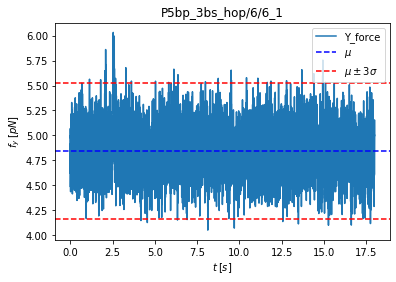

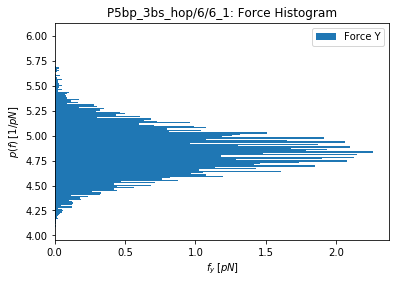

In [6]:
grafici = Graph_hop(dir_name, number, 1)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

## Suspicious data: no hopping events observed

In [7]:
# prova = [2.2, 4., 0.3, 0.3, 3.5, 0.1]
# fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)

In [8]:
# forces_average.append(mean(fitting_par[1], fitting_par[4]))
# forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
# w_U.append(prob[0])
# w_N.append(prob[1])
# sigma_w_U.append(err_prob[0])
# sigma_w_N.append(err_prob[1])

In [9]:
# grafici.subplots(fitting_par)

In [10]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.8744,0.3450,241.28955,4.6226,0.00000
1,-0.5743,0.2851,241.33320,4.8313,-0.00098
2,-0.0089,0.4533,241.52090,4.8414,0.00098
3,-0.6267,0.1575,242.01415,4.9121,0.00098
4,-0.8256,-0.0223,241.46580,4.8448,0.00195
...,...,...,...,...,...
17240,-0.8204,-0.1673,240.12860,4.9272,17.98730
17241,-0.4225,-0.2572,239.97035,5.1545,17.98730
17242,-0.7785,-0.1151,240.40335,5.0030,17.98926
17243,-0.6162,-0.0542,240.14115,4.9676,17.98926


# File 2

f media vale = 4.506451620242702, con deviazione standard = 0.309032172391786


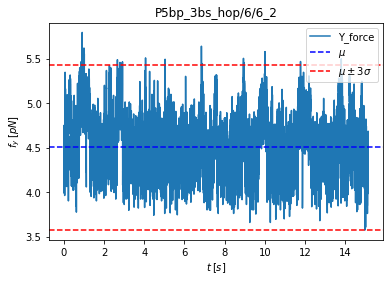

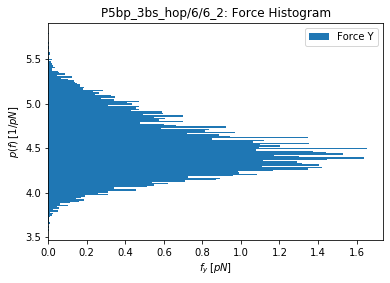

In [11]:
grafici = Graph_hop(dir_name, number, 2)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

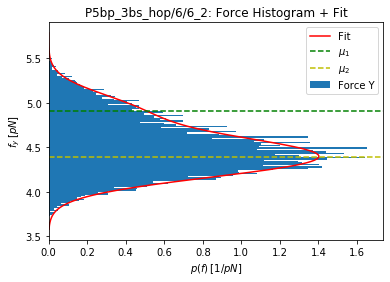

c_1 = 0.4145591201806894, mu_1 = 4.904744977311082, sigma_1 = 0.2134410390577008
c_2 = 1.3790745566795153, mu_2 = 4.389683443385157, sigma_2 = 0.22490381636583368
sigma_c_1 = 0.03990747538787087, sigma_mu_1 = 0.05232663086781621, sigma_sigma_1 = 0.038221568547741204
sigma_c_2 = 0.05067349433795412, sigma_mu_2 = 0.01661522239617118, sigma_sigma_2 = 0.00937097824001445
w_U = 0.2217963191897743, sigma_w_U = 0.04509296006614351
w_N = 0.7774536470241958, sigma_w_N = 0.04319081388782403


In [12]:
prova = [0.4, 4.9, 0.1, 1.4, 4.3, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [13]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

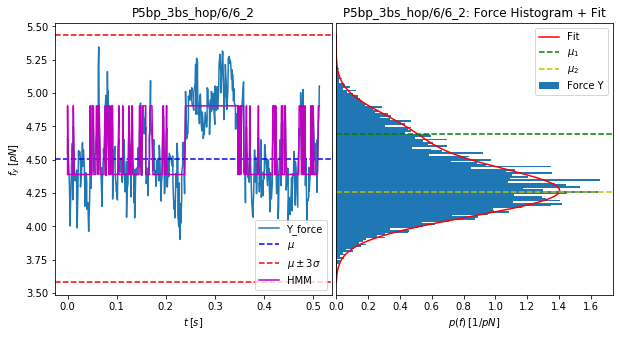

In [19]:
grafici.subplots(fitting_par, True, 500)

In [15]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.0037,0.2706,229.50695,4.5485,0.00000
1,-0.6162,0.2010,229.42095,4.6545,0.00000
2,-0.1276,0.2638,229.49880,4.6226,0.00098
3,-1.0001,0.5731,229.58760,4.2926,0.00391
4,-1.1746,0.4958,229.85130,4.1176,0.00488
...,...,...,...,...,...
14499,-0.2288,-0.2630,230.03470,4.5788,15.13477
14500,-0.8465,-0.3935,229.86000,4.6848,15.13574
14501,-0.5638,0.0038,230.22480,4.4879,15.13574
14502,-0.7052,-0.1267,229.98415,4.5384,15.13672


# File 3

f media vale = 4.1745962678375355, con deviazione standard = 0.30865529479707404


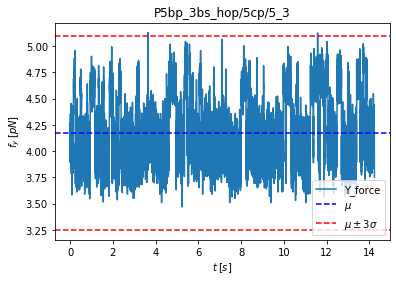

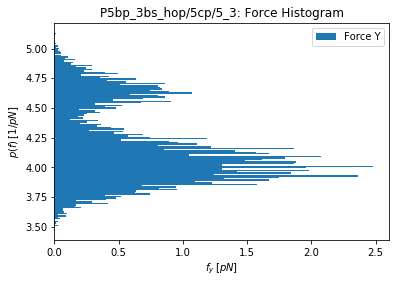

In [17]:
grafici = Graph_hop(dir_name, number, 3)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

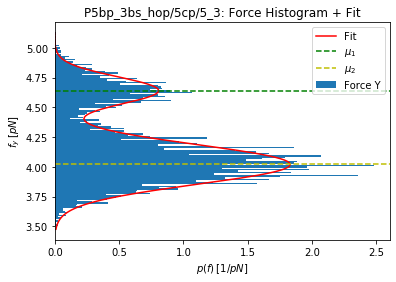

c_1 = 0.8062848263502903, mu_1 = 4.641409478441393, sigma_1 = 0.11605253542520855
c_2 = 1.8316490036495479, mu_2 = 4.020232461934748, sigma_2 = 0.16616112084736498
sigma_c_1 = 0.05739896734766095, sigma_mu_1 = 0.009789168865284918, sigma_sigma_1 = 0.009845215290484804
sigma_c_2 = 0.04710603672737225, sigma_mu_2 = 0.005001430585180348, sigma_sigma_2 = 0.005092949807317275
w_U = 0.23454871285808482, sigma_w_U = 0.025975425972854516
w_N = 0.7628894363844299, sigma_w_N = 0.030523876282031216


In [18]:
prova = [0.7, 4.6, 0.1, 1.8, 4.0, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [19]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

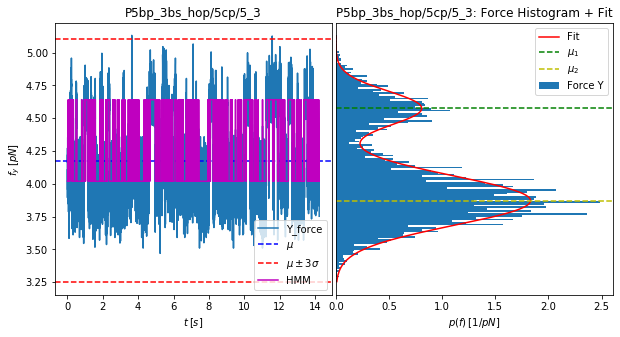

In [20]:
grafici.subplots(fitting_par)

In [21]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.4128,0.1475,70.22640,4.1064,0.00000
1,0.8264,0.1591,70.44005,3.9751,0.00000
2,0.2191,0.1707,70.78085,3.8943,0.00195
3,0.4425,0.2210,70.39545,4.2310,0.00000
4,0.5611,0.3795,70.13420,4.1771,0.00391
...,...,...,...,...,...
13660,0.4634,-0.2121,65.48650,3.9482,14.23242
13661,0.4006,-0.1927,65.71430,3.8876,14.23242
13662,-0.2468,-0.2324,65.98220,4.0054,14.23242
13663,-0.1316,-0.2527,66.41770,3.8893,14.23438


# File 4

f media vale = 3.571759740259746, con deviazione standard = 0.2626093874775216


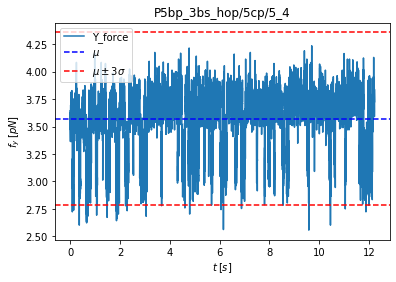

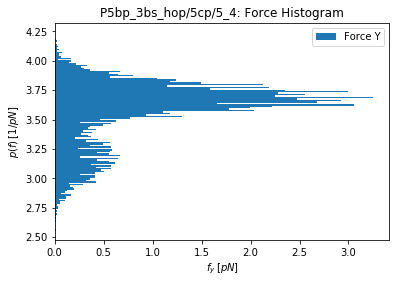

In [22]:
grafici = Graph_hop(dir_name, number, 4)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

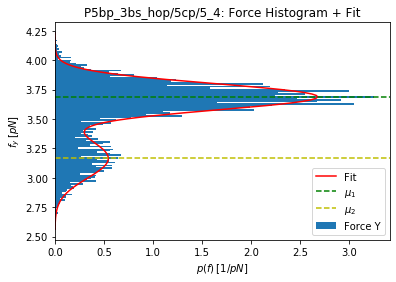

c_1 = 2.677059057243191, mu_1 = 3.6888737874946815, sigma_1 = 0.11234451390945545
c_2 = 0.5442873049682126, mu_2 = 3.163975137989911, sigma_2 = 0.168366690419819
sigma_c_1 = 0.05925007139620924, sigma_mu_1 = 0.0031538090861071132, sigma_sigma_1 = 0.003285707704963466
sigma_c_2 = 0.04807536946518923, sigma_mu_2 = 0.01830523461833307, sigma_sigma_2 = 0.01950721199783309
w_U = 0.7538757190395086, sigma_w_U = 0.02765006874881413
w_N = 0.229707044544912, sigma_w_N = 0.033466016707012915


In [23]:
prova = [2.5, 3.6, 0.1, 0.5, 3.2, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [24]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

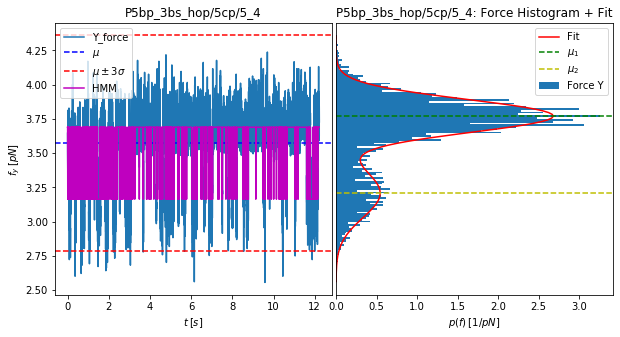

In [25]:
grafici.subplots(fitting_par)

In [26]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.0795,0.1282,34.43440,3.6452,0.00000
1,0.6519,0.0354,34.31250,3.6048,0.00000
2,0.6379,-0.0381,34.32445,3.5442,0.00196
3,0.6693,-0.0207,34.62430,3.5105,0.00196
4,0.4913,-0.1193,34.42005,3.5307,0.00391
...,...,...,...,...,...
11699,0.4215,0.0315,34.78700,3.7664,12.22071
11700,0.5821,0.0973,34.19465,3.8405,12.22071
11701,-0.0391,0.0083,34.78590,3.6317,12.22071
11702,-0.1316,0.0286,34.86950,3.7226,12.22461


# File 5

f media vale = 4.343044472140798, con deviazione standard = 0.2792036875962269


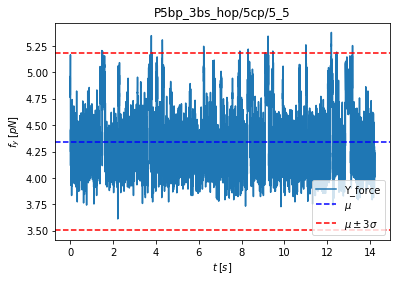

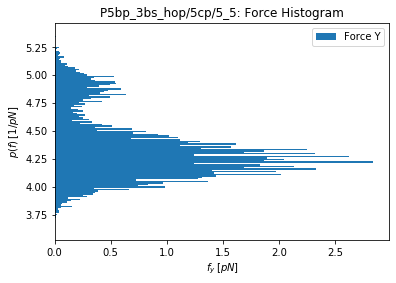

In [27]:
grafici = Graph_hop(dir_name, number, 5)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

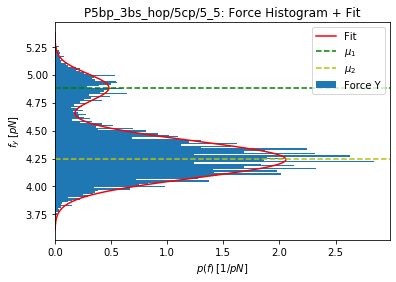

c_1 = 0.4798656881047052, mu_1 = 4.883467088114033, sigma_1 = 0.1248797975297362
c_2 = 2.05881663824931, mu_2 = 4.241152806342971, sigma_2 = 0.16484723850716024
sigma_c_1 = 0.056973467468708246, sigma_mu_1 = 0.017514432183322423, sigma_sigma_1 = 0.017635004162451718
sigma_c_2 = 0.04875182608823472, sigma_mu_2 = 0.004572277616616472, sigma_sigma_2 = 0.004638693097755192
w_U = 0.15021102780002035, sigma_w_U = 0.027713114590647105
w_N = 0.8507251652206053, sigma_w_N = 0.03128706661810581


In [28]:
prova = [0.5, 4.8, 0.1, 2., 4.2, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [29]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

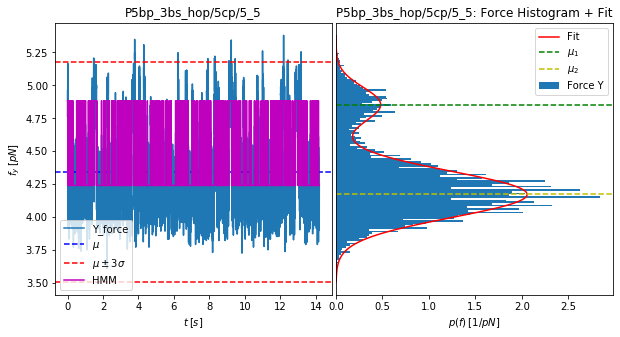

In [30]:
grafici.subplots(fitting_par)

In [31]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.3866,-0.2208,64.01745,4.9599,0.00000
1,0.4006,-0.1695,63.56275,4.9245,0.00000
2,0.2470,-0.1038,64.27315,4.8909,0.00000
3,0.4390,-0.0787,63.91100,4.7629,0.00195
4,0.8264,-0.1077,64.23520,4.9043,0.00391
...,...,...,...,...,...
13635,0.7322,-0.3194,63.94285,4.1367,14.20117
13636,0.7583,-0.3745,63.85240,4.2428,14.20117
13637,0.2139,-0.4586,64.01660,4.0054,14.20313
13638,-0.1997,-0.3600,64.02660,4.0054,14.20508


# File 6

f media vale = 3.947100949230549, con deviazione standard = 0.3241706722367112


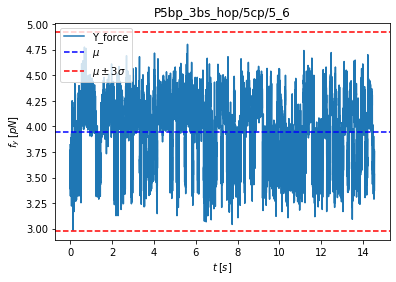

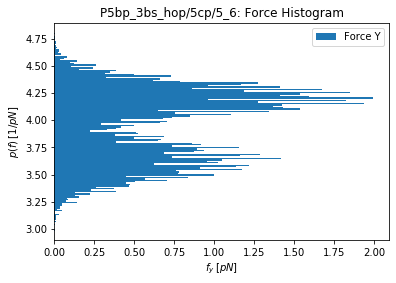

In [32]:
grafici = Graph_hop(dir_name, number, 6)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

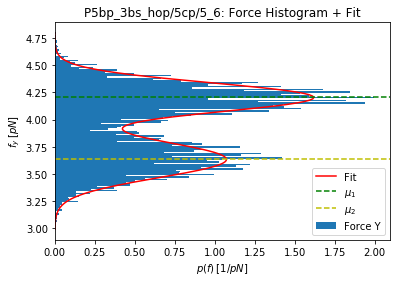

c_1 = 1.615748280978381, mu_1 = 4.203676454153442, sigma_1 = 0.13435702483597323
c_2 = 1.0729684530385941, mu_2 = 3.6335173801666913, sigma_2 = 0.16747644628090497
sigma_c_1 = 0.04813374180610072, sigma_mu_1 = 0.005008882301066762, sigma_sigma_1 = 0.005304987028482601
sigma_c_2 = 0.042452724008332436, sigma_mu_2 = 0.008214063226051243, sigma_sigma_2 = 0.008645208581303599
w_U = 0.5441567429194296, sigma_w_U = 0.0269149883619722
w_N = 0.4504334394078389, sigma_w_N = 0.029295884553907397


In [33]:
prova = [1.7, 4.2, 0.1, 1., 3.6, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [34]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

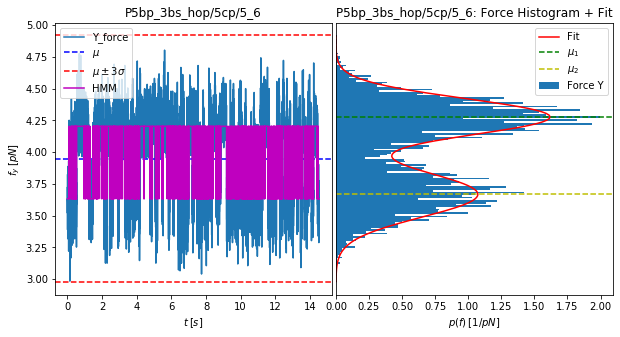

In [35]:
grafici.subplots(fitting_par)

In [36]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,1.0218,0.2403,42.23420,3.8203,0.00000
1,1.3080,0.1417,42.18325,3.7630,0.00195
2,1.3918,0.0663,42.37205,3.5307,0.00391
3,0.9101,0.0431,42.35340,3.5206,0.00391
4,0.2453,0.0025,42.09780,3.6267,0.00586
...,...,...,...,...,...
13901,0.1144,-0.1106,42.36565,3.3691,14.52930
13902,0.3081,-0.1222,42.10130,3.6519,14.53125
13903,-0.1578,-0.0178,42.29030,3.5610,14.53125
13904,-0.2468,-0.0816,42.35945,3.6166,14.53125


# File 7

f media vale = 3.9170464268960328, con deviazione standard = 0.33191509986558826


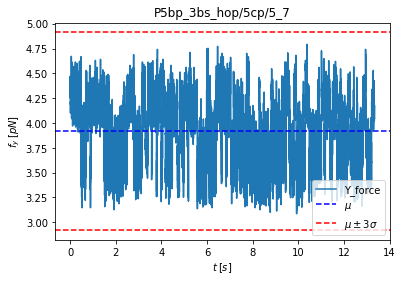

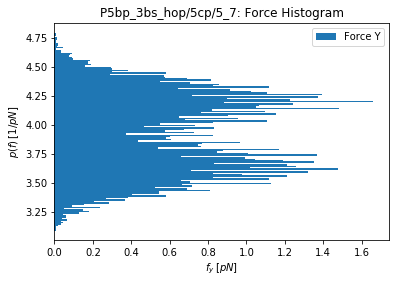

In [37]:
grafici = Graph_hop(dir_name, number, 7)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

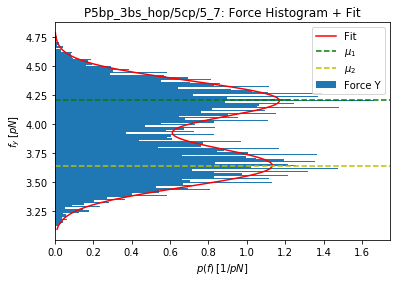

c_1 = 1.1609949144397995, mu_1 = 4.206300819001591, sigma_1 = 0.1674338390685071
c_2 = 1.1293020769775732, mu_2 = 3.640543900597382, sigma_2 = 0.18099947565131025
sigma_c_1 = 0.04077814635836535, sigma_mu_1 = 0.00906374175500507, sigma_sigma_1 = 0.009657866868857183
sigma_c_2 = 0.03840936927430508, sigma_mu_2 = 0.009585852110803194, sigma_sigma_2 = 0.009524960775493339
w_U = 0.4872630583754252, sigma_w_U = 0.03290679800079672
w_N = 0.5123625492369405, sigma_w_N = 0.03210391954202674


In [38]:
prova = [1.4, 4.2, 0.2, 1.2, 3.6, 0.2]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [39]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

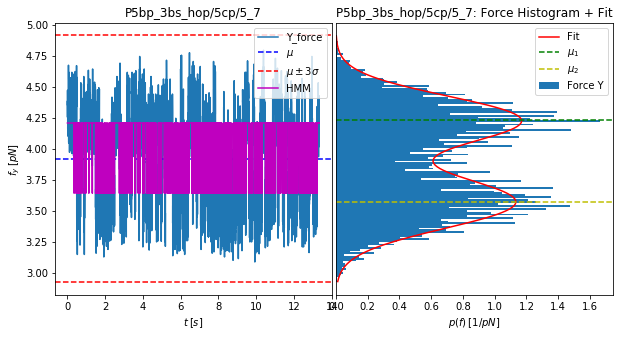

In [40]:
grafici.subplots(fitting_par)

In [41]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.1683,0.0460,65.94520,4.3791,0.00000
1,0.1563,0.1127,65.86355,4.3539,0.00000
2,0.9730,0.1707,65.60255,4.4599,0.00000
3,0.6589,0.0547,65.54525,4.4397,0.00196
4,0.4844,0.1050,65.90015,4.3185,0.00391
...,...,...,...,...,...
12785,-0.6673,-0.3861,65.03815,4.0559,13.33399
12786,-0.0007,-0.2788,65.24970,4.1519,13.33399
12787,0.1406,-0.2411,64.96500,4.1771,13.33594
12788,-0.3620,-0.3194,64.60230,4.0408,13.33789


In [42]:
forces_average

[3.6185215084280333,
 4.406034121605133,
 4.33082097018807,
 3.426424462742296,
 4.562309947228502,
 3.9185969171600665,
 3.9234223597994866]

## Average of the average -> $\bar{f} = \frac{\mu_1 + \mu_2}{2}$

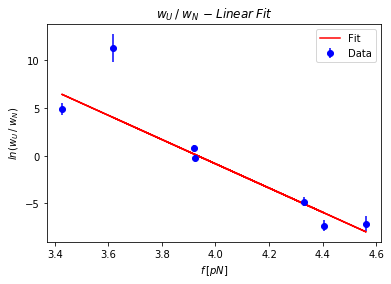

La forza di coesistenza vale f_c = 3.9332182091027703, con sigma = 0.2757403706628752
La differenza di lunghezza tra lo stato foldend e unfolded è x_NU = 12.71764133525315, con sigma = 0.6218540765033573
La differenza di energia libera DeltaG_NU = 50.02125847665576, con sigma = 2.5129760695442918


In [43]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

# O sono due molecole diverse?

In [44]:
def remove_element(arr, pos):
    arr.pop(pos)
    return arr

In [45]:
# proviamo ad eliminare il pimo punto, quello più in alto
forces_average = remove_element(forces_average, 0)
w_U = remove_element(w_U, 0)
w_N = remove_element(w_N, 0)
sigma_w_U = remove_element(sigma_w_U, 0)
sigma_w_N = remove_element(sigma_w_N, 0)

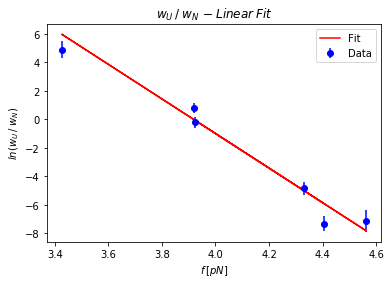

La forza di coesistenza vale f_c = 3.918045268721933, con sigma = 0.2932932323044576
La differenza di lunghezza tra lo stato foldend e unfolded è x_NU = 12.138169695376888, con sigma = 0.6319378158958621
La differenza di energia libera DeltaG_NU = 47.55789834591536, con sigma = 2.558031198170318


In [46]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [37]:
# x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U[3:], w_N[3:], forces_average[3:], sigma_w_U[3:], sigma_w_N[3:]) 